In [1]:
#DEV
import os
import glob
import numpy as np
from platform import system as OS
import pandas as pd
import tables as tb
import h5py
import scipy.stats
import datetime
from copy import deepcopy
from IPython.display import clear_output, display, HTML, Image
import matplotlib.cm as cm
import warnings

warnings.filterwarnings("ignore")
import sys
import pickle
import matplotlib.pyplot as plt

if OS() == 'Linux':
    root = "/data"
elif OS() == 'Windows':
    root = "C:\\DATA\\"
else:
    root = "/Users/davidrobbe/Documents/Data/"

param={
    "goalTime":7,#needed for pavel data only
    "treadmillRange":[0,90],#pavel error conversion "treadmillRange":[0,80]
    "maxTrialDuration":15,
    "interTrialDuration":10,#None pavel
    "endTrial_frontPos":30,
    "endTrial_backPos":55, 
    "endTrial_minTimeSec":4,
    "cameraSamplingRate":25, #needed for new setup    

    "sigmaSmoothPosition":0.1,#0.33, 0.18 pavel
    "sigmaSmoothSpeed":0.3,#0.3, 0.5 pavel
    "nbJumpMax":100,#200 pavel
    "binSize":0.25,
    #parameters used to preprocess (will override the default parameters)
}  

%run Animal_Tags.ipynb
%run BatchRatBehavior.ipynb
%run plotRat_documentation_3_KinematicsInvestigation.ipynb
%run plotRat_documentation_1_GeneralBehavior.ipynb
%run loadRat_documentation.ipynb


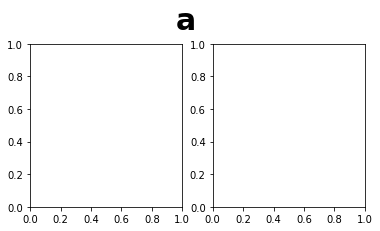

In [2]:
fig=plt.figure(figsize=(6,3))
q=fig.add_subplot(121)
ax=fig.add_subplot(122)
axbox=ax.get_window_extent()
fbox=fig.bbox


ax.text(.9*axbox.x0/fbox.xmax, 1.1*axbox.y1/fbox.ymax, r'a',fontweight='bold', fontsize=30, ha='center', va='center',
       transform=fig.transFigure)



plt.show()

In [83]:
print(axbox.bounds)
axbox.x0,axbox.y0,axbox.x1,axbox.y1

(236.61818181818177, 27.0, 152.1818181818182, 163.08)


(236.61818181818177, 27.0, 388.79999999999995, 190.08)

linear regression

In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3


In [39]:
reg = LinearRegression().fit(X, y)

In [40]:
reg.coef_

array([1., 2.])

lasso

In [41]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
reg.coef_

array([0.60012207, 1.99993896])

linear regression on polynomial regressors

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_new= poly.fit_transform(X)
y = np.dot(X, np.array([1, 2])) + 3


In [52]:
reg = LinearRegression().fit(X_new, y)

In [53]:
reg.coef_

array([ 0.        ,  0.18421053,  1.78947368,  0.55263158, -0.42105263,
        0.21052632])

In [54]:
X_new

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 2., 1., 2., 4.],
       [1., 2., 2., 4., 4., 4.],
       [1., 2., 3., 4., 6., 9.]])

In [2]:
sys.path.append('/home/david/MasoudRepo/masoud_treadmilltask')

In [3]:
import DataAcquisition

In [6]:
DataAcquisition.Animal_Tags.clear_output()

In [36]:
class test:
    b=0
    def __init__(self):
        __class__.b=4
    @classmethod
    def met1(cls,a):
        print('class var:',a,cls)
        cls.a=a
        print(cls.__dict__)
    

In [37]:
a=test()

a.met1(12)

b=test()

class var: 12 <class '__main__.test'>
{'__module__': '__main__', 'b': 4, '__init__': <function test.__init__ at 0x7f6df41c1bf8>, 'met1': <classmethod object at 0x7f6df417b2b0>, '__dict__': <attribute '__dict__' of 'test' objects>, '__weakref__': <attribute '__weakref__' of 'test' objects>, '__doc__': None, 'a': 12}


In [13]:
class tst(dict):
    b=2
    def __init__(self):
        self.a = 1 + self.b
A=tst()
with open('/home/david/tst.p','wb') as f:
    pickle.dump(A,f)

In [43]:
seed=[2018,4,9]
np.random.seed(seed=seed)
names=['David','Teresa','Anass','Ayse','Mostafa','Ingrid','Maryam']

np.random.shuffle(names)
print(names)

['Ayse', 'Ingrid', 'Maryam', 'David', 'Mostafa', 'Teresa', 'Anass']


In [46]:
session='Rat242_2018_06_25_11_29'
data=Data(root,session[:6],session,param=param,redoPreprocess=False, saveAsPickle=False);
data.position_correction();

In [85]:
data.entranceTime[i]+data.cameraToTreadmillDelay+data.interTrialDuration[i], data.rawTime[50][-1]

(25.54, 24.4)

In [94]:
data.timeTreadmill[i][-1]

23.399999999999636

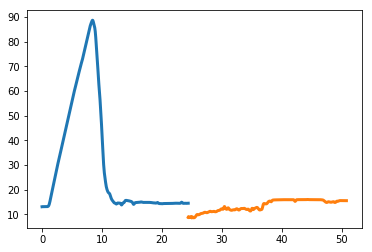

In [90]:
i=50
ax=plt.figure().add_subplot(111)
ax.plot(data.rawTime[i],data.position[i],lw=3)
ax.plot(data.rawTime[i+1]+data.rawTime[i][-1],data.position[i+1],lw=3)
# ax.vlines(data.entranceTime[i]+1,10,80)

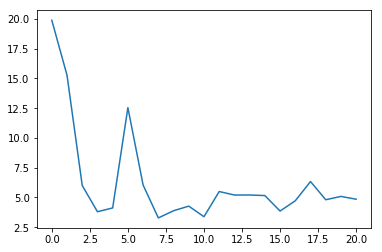

In [49]:
profile1={'Type':'Good',
         'rewardType':'Progressive',
         'initialSpeed':'10',
         'Speed':['10'],
         'Tag':'Early-Lesion_DMS'
         }

sessions=batch_get_session_list(root,animalList=['Rat101'],profile=profile1)['Sessions']
a=[]
for session in sessions:
    data=Data(root,session[:6],session,param=param,redoPreprocess=False, saveAsPickle=False);
    a.append(np.sum((data.entranceTime-7)**2)/len(data.entranceTime))
plt.plot(a)

In [50]:
a=np.array([1,2,3,4,5,6])

In [54]:
a.m

3.5

In [2]:
filename='/data/Rat172/Experiments/Rat172_2018_02_25_14_36/Rat172_2018_02_25_14_36.raw.kwd'

with tb.open_file(filename,"r") as kwd:
    print("\n\nopenning %s"%(filename))
    dataLen,nchannels=kwd.get_node("/recordings/0/data").read().shape
    sampling_rate=kwd.get_node("/recordings/0/")._v_attrs.__getitem__('sample_rate')
print(dataLen,nchannels,sampling_rate)



openning /data/Rat172/Experiments/Rat172_2018_02_25_14_36/Rat172_2018_02_25_14_36.raw.kwd
54310500 37 44100.0


In [3]:
f = h5py.File(filename, 'r')

data = {}
data['info'] = {Rec: f['recordings'][Rec].attrs 
                for Rec in f['recordings'].keys()}

R = list(f['recordings'])[0]
if 'channel_bit_volts' in f['recordings'][R]\
                           ['application_data'].keys():
    data['channel_bit_volts'] = {Rec: f['recordings'][Rec]\
                                       ['application_data']\
                                       ['channel_bit_volts']
                                 for Rec in f['recordings'].keys()}
data['info']['0']['sample_rate']

44100.0

In [7]:
filename="/data/RatTST/Experiments/RatTST_2018_02_25_14_36/RatTST_2018_02_25_14_36.kwik"
f= h5py.File(filename, 'r')

In [54]:
f['channel_groups']['0']['spikes']['time_samples'][:100]

array([  465,   723,   912,  1159,  1188,  1223,  1333,  1558,  1645,
        1823,  1845,  2058,  2538,  2671,  2696,  2929,  2959,  3131,
        3926,  4396,  4456,  4866,  5244,  5303,  5647,  5767,  5784,
        5934,  6217,  6463,  6626,  6686,  6869,  6948,  8245,  8435,
        8461,  8649,  9115,  9202,  9797,  9911, 10067, 10160, 10382,
       10571, 10790, 10939, 11300, 11497, 11964, 12928, 12960, 13301,
       13331, 13553, 13633, 13948, 14138, 14566, 15307, 15755, 15965,
       15997, 16361, 16429, 16956, 17017, 17095, 17193, 17194, 17195,
       17195, 17228, 17276, 17336, 17433, 17939, 17983, 18036, 18156,
       18221, 18336, 18382, 18416, 18416, 18497, 18497, 18498, 18535,
       18596, 18623, 18624, 18625, 18625, 18625, 18625, 18626, 18651,
       18657], dtype=uint64)

In [38]:
f['channel_groups']['0']['spikes']['time_samples'].shape

(925799,)

In [ ]:
import os
import h5py
import tables as tb
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

filetype='dat'
#inputFile="/home/david/TEMP/TestData/testdata openephys/2016-11-04_11-49-24/experiment1_103.raw.kwd"
#inputFile="/data/SWI002/2/SWI002_2016_09_20_12_31/SWI002_2016_09_20_12_31.raw.kwd"

#sampling_rate=kwd['recordings']['0'].attrs['sample_rate']
#f = h5py.File('inputFile','r')
fnameout = inputFile[:-7] + filetype

with tb.open_file(inputFile,"r") as f:
    #data = f['recordings'][str(0)]['data'][:,:]
    print((f.get_node("/recordings/0/data").read().shape))
    print((f.get_node('/recordings/0/')._v_attrs.__getitem__('sample_rate')))
    print(f.root.recordings._v_nchildren)

In [ ]:
f = h5py.File("/data/Rat105/Experiments/Rat105_2016_12_12_16_11/Rat105_2016_12_12_16_11.kwik",'r')
info=f['recordings']['1']['data'].shape
print((info))

In [ ]:
import KWIKphy
from KWIKphy.session import Session
f = "/data/Rat105/Experiments/Rat105_2016_12_12_16_11/Rat105_2016_12_12_16_11.kwik"
session= Session(f)

In [ ]:
print (session.model._metadata)
for shank in session.model._channel_groups:
    session.model._channel_group=shank
    print(shank,session.model._channel_group)

In [ ]:
session.model.__dict__.keys()

In [ ]:
#To read a kwik file using KWIKphy
from KWIKphy.session import Session
inputFile="/data/SWI002/2/SWI002_2016_09_20_12_52/SWI002_2016_09_20_12_52.kwik"
session= Session(inputFile)


In [ ]:
prmFile='/data/Rat107/Experiments/Rat107_2017_03_20_10_38/Rat107_2017_03_20_10_38.prm'
def a():
    x=1
    def b():
        CWD=os.getcwd()
        os.chdir('/data/Rat107/Experiments/Rat107_2017_03_20_10_38')
        prmName=os.path.basename(prmFile)
        %run -i $prmName
        os.chdir(CWD)
        return locals()
    return b()


In [ ]:
data=pd.read_csv("/data/Rat082/Rat082.tag",delim_whitespace=True,skiprows=range(5))
data

In [127]:
a=[1,2,3,4,5,6]
try:
    a.remove('3')
except:pass
a

[1, 2, 3, 4, 5, 6]

In [4]:
profile1={'Type':'Good',
         #'rewardType':'Progressive',
         #'initialSpeed':'10',
         #'Speed':['10'],
         'Tag':'Early-Lesion_M1-Late-Lesion_DLS'
         }


animalList=batch_get_animal_list(root,profile1)
sessionProfile=batch_get_session_list('/data',animalList,profile1)
print (animalList)
#print(pd.DataFrame(sessionProfile))

['Rat041', 'Rat042', 'Rat047', 'Rat057', 'Rat059', 'Rat070', 'Rat075']


In [2]:
picklePath='/data/Rat084/Experiments/Rat084_2016_10_06_11_28/Analysis/preprocesseddata_binsize250ms_.p'
with open(picklePath,'rb') as f:
    data=pickle.load(f)
data.keys()

dict_keys(['startFrame', 'xmlDict', 'treadmillRange', 'speedSmoothBin', 'rawPosition', 'timeTreadmill', 'lickTime', 'endTrial_backPos', 'realTrials', 'hasBehavior', 'parameters', 'trialOffset', 'positionDiffRange', 'position', 'medianPositionAlignEnd', 'sigmaSmoothSpeed', 'treadmillSpeed', 'deliveredReward', 'timeAlignEnd', 'indexEndTrial', 'deliveredRewardRatio', 'endTrial_frontPos', 'trialNotTracked', 'jumpFrame', 'maxTrialDuration', 'cameraStartTime', 'experiment', 'timeEndTrial', 'rawTime', 'positionAlignEnd', 'interTrialDuration', 'sigmaSmoothPosition', 'experimenter', 'cameraToTreadmillDelay', 'binSize', 'animal', 'entranceTime', 'timeBin', 'goodTrials', 'analysisPath', 'speedBin', 'fullPath', 'nTrial', 'hasEEG', 'nbJumpMax', 'treadmillStartTime', 'medianPosition', 'accelerationOnSpeedSmoothBin', 'accelerationOnSpeedBin', 'sessionPath', 'startAnalysisParams', 'emptyAnalysisFiles', 'stopFrame', 'positionBin', 'dataType', 'root', 'cameraSamplingRate', 'pawFrequencyRange', 'goalTime

In [6]:
import math
(math.factorial(23)/(math.factorial(9)*math.factorial(14)))

817190.0

In [16]:
profile={'Type':'Good',
         'rewardType':'Progressive',
         'initialSpeed':'10',
         'Speed':'10',
         'Tag':['Early-Lesion_DLS-BackTo10','Early-Lesion_DLS-Late-var']
        }

a=batch_get_animal_list(root,profile)
a

['Rat079',
 'Rat081',
 'Rat082',
 'Rat097',
 'Rat099',
 'Rat100',
 'Rat114',
 'Rat116',
 'Rat136']

In [83]:
a=[[]]*3
a

[[], [], []]

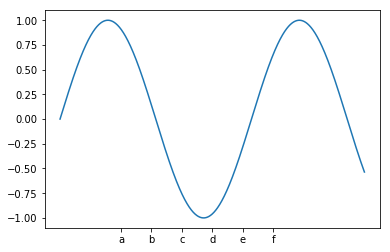

In [6]:
x=np.arange(0,10,0.01)
y=np.sin(x)
f=plt.figure()
ax=plt.subplot(1,1,1)
plt.plot(x,y)
ax.set_xticks(range(2,8))
ax.set_xticklabels(['a','b','c','d','e','f'])
plt.show()

In [78]:
[ax.get_xticklabels()[i].get_text() for i in range(6)]

['a', 'b', 'c', 'd', 'e', 'f']

In [6]:
def f1 (a):
    print(a)
    return 1
def f2 (a,b):
    c=a(b)
    print(c)
    return c
f2(f1,5)

5
1


1

In [69]:
def f(a,b=1):
    print(type(b))
    print(b)
f(a=1,b=np.ones(5))

<class 'numpy.ndarray'>
[ 1.  1.  1.  1.  1.]


In [71]:
import inspect
inspect.getargspec(f)

ArgSpec(args=['a', 'b'], varargs=None, keywords=None, defaults=(1,))

In [67]:
inspect.getargspec(update_animal_table_file)[0]

['root', 'days_to_check']

In [74]:
dic={'a':1,'b':[]}
f(**dic)

<class 'list'>
[]


In [15]:
import time
print(time.perf_counter())

1217442.431702497


In [2]:
import pims

In [6]:
a=pims.NorpixSeq("/data/Rat106/Experiments/Rat106_2017_03_31_10_56/Rat106_2017_03_31_10_56.seq").header_dict['compression_format']

OSError: Only uncompressed images are supported in .seq files